# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.6 which is incompatible.


We begin by importing the necessary packages. If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](https://numpy.org/).

In [2]:
from unityagents import UnityEnvironment
from collections import deque
from maddpg_agent import Agent
import numpy as np
import time
import torch

Next, we will start the environment! Before running the code cell below, change the file_name parameter to match the location of the Unity environment that you downloaded.

* **Mac**: "path/to/Tennis.app"
* **Windows** (x86): "path/to/Tennis_Windows_x86/Tennis.exe"
* **Windows** (x86_64): "path/to/Tennis_Windows_x86_64/Tennis.exe"
* **Linux** (x86): "path/to/Tennis_Linux/Tennis.x86"
* **Linux** (x86_64): "path/to/Tennis_Linux/Tennis.x86_64"
* **Linux** (x86, headless): "path/to/Tennis_Linux_NoVis/Tennis.x86"
* **Linux** (x86_64, headless): "path/to/Tennis_Linux_NoVis/Tennis.x86_64"

For instance, if you are using a Mac, then you downloaded Tennis.app. If this file is in the same folder as the notebook, then the line below should appear as follows:

env = UnityEnvironment(file_name="Tennis.app")

In [3]:
env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1. If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01. Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping.

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [6]:
for i in range(5):                                         # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.04500000085681677
Total score (averaged over agents) this episode: 0.04500000085681677
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291


### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

In [7]:
# Multi-Agent Deep Deterministic Policy Gradient (DDPG)
def maddpg(n_episodes=2000):
    """
    Params
    ======
        n_episodes (int) : maximum number of training episodes
        agents           : list of agents  
    """
    max_scores = []                                 # list of maximum scores from each episode
    best_score = -np.inf 
    scores_window = deque(maxlen=100)               # mean scores from most recent episodes
    agents = []
    for i in range(num_agents):
         agents.append(Agent(state_size=state_size, action_size=action_size, random_seed=8))
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]       # reset environment
        states = env_info.vector_observations                   # get current state for each agent      
        scores = np.zeros(num_agents)                           # initialize score for each agent
        for agent in agents:
            agent.reset()
        while True:
            actions = []
            for i in range(num_agents):
                action = agents[i].act(state=states[i])
                actions.append(action)
            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished
            scores += np.max(rewards)                          # update the score (for each agent)
            for i in range(num_agents):
                agents[i].step(states[i], actions[i], rewards[i], next_states[i], dones[i])
            states = next_states                               # roll over states to next time step
            if np.any(dones):                                  # exit loop if episode finished
                break

        max_score = np.max(scores)
        max_scores.append(max_score)                         # save maximum score for the episode
        scores_window.append(max_scores[-1])                 # save maximum score to window
        if max_scores[-1] > best_score:
            best_score = max_scores[-1]
 
        if i_episode % 25 == 0:
            print('\rEpisode {}: \tAverage Score: {:.2f}\tBest Score: {}'.format(\
                  i_episode, np.mean(scores_window), best_score))
                  
        if np.mean(scores_window) >= 0.5:
            print('\nEnvironment solved in {} episodes!\tAverage Score = {:.2f} over last 100 episodes'.format(\
                                    i_episode, np.mean(scores_window)))
            for i in range(num_agents):
                torch.save(agents[i].actor_local.state_dict(), 'Result/actor{}.pth'.format(i+1))
                torch.save(agents[i].critic_local.state_dict(), 'Result/critic{}.pth'.format(i+1))
            break
            
    return max_scores

In [8]:
# Train the agents
scores = maddpg()

Episode 25: 	Average Score: 0.00	Best Score: 0.0
Episode 50: 	Average Score: 0.00	Best Score: 0.0
Episode 75: 	Average Score: 0.01	Best Score: 0.10000000149011612
Episode 100: 	Average Score: 0.02	Best Score: 0.30000000447034836
Episode 125: 	Average Score: 0.03	Best Score: 0.30000000447034836
Episode 150: 	Average Score: 0.05	Best Score: 0.30000000447034836
Episode 175: 	Average Score: 0.05	Best Score: 0.4000000059604645
Episode 200: 	Average Score: 0.06	Best Score: 0.4000000059604645
Episode 225: 	Average Score: 0.07	Best Score: 0.4000000059604645
Episode 250: 	Average Score: 0.07	Best Score: 0.4000000059604645
Episode 275: 	Average Score: 0.07	Best Score: 0.4000000059604645
Episode 300: 	Average Score: 0.07	Best Score: 0.4000000059604645
Episode 325: 	Average Score: 0.07	Best Score: 0.4000000059604645
Episode 350: 	Average Score: 0.07	Best Score: 0.4000000059604645
Episode 375: 	Average Score: 0.09	Best Score: 0.6000000089406967
Episode 400: 	Average Score: 0.12	Best Score: 0.600000

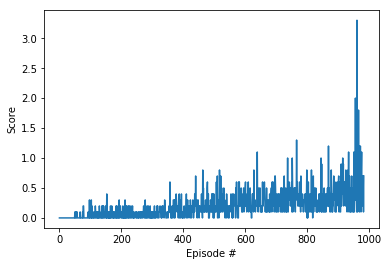

In [9]:
# Plot the scores
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

When finished, close the environment.

In [10]:
env.close()